<a href="https://colab.research.google.com/github/OjChi/Masters-Temp-Repo/blob/main/mnist_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### The MNIST dataset

The MNIST dataset is composed of 70,000 $28 \times 28$ grayscale images of handwritten digits. It is represented as a $70000 \times 28 \times 28$ numpy array (a "3d matrix").

In [3]:
x = np.load("/content/drive/MyDrive/Sem 1/1014/HW7/mnist.npy")
print(x.shape)

(70000, 28, 28)


Display the first few digits in the dataset.

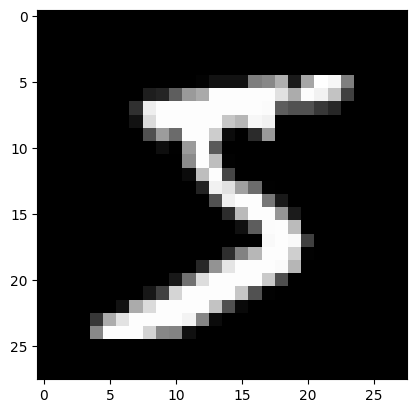

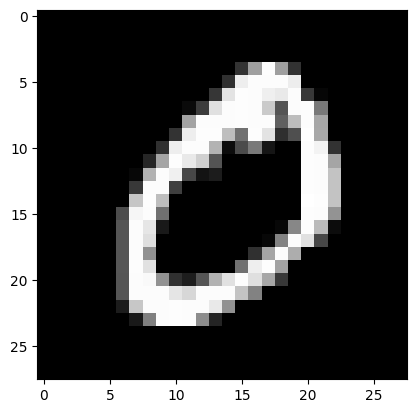

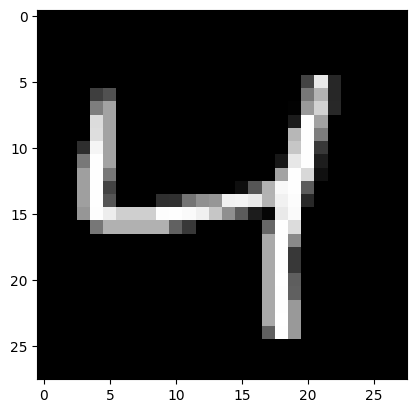

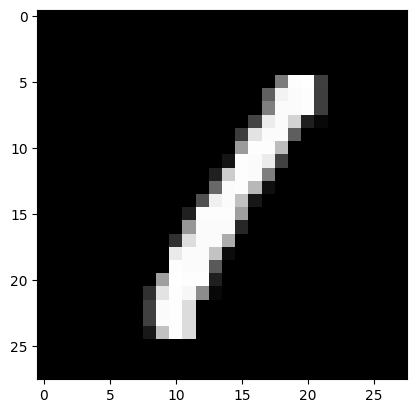

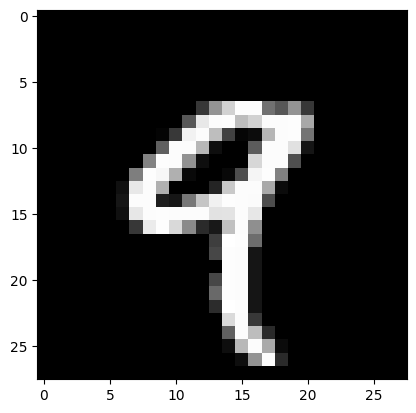

In [4]:
for i in range(5):
    plt.imshow(x[i], cmap="gray")
    plt.show()

### Computing and diagonalizing the covariance of MNIST

We will interpret each image as a vector in $\mathbb{R}^{d}$ with $d = 28^2 = 768$. The dataset can thus be seen as a matrix $in \mathbb{R}^{n \times d}$ where $n = 70000$.

In [5]:
xx = x.reshape((x.shape[0], -1))

In [6]:
x.shape,xx.shape

((70000, 28, 28), (70000, 784))

1) Compute the mean $\mu \in \mathbb R^{d}$ of the MNIST dataset and plot it as a $28 \times 28$ image.

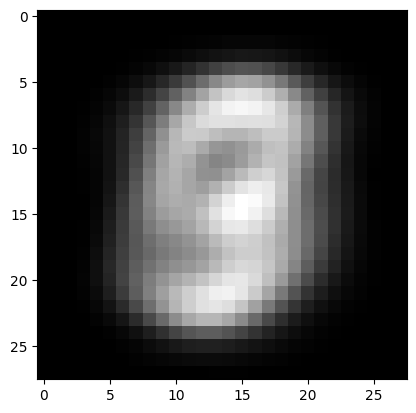

In [7]:
n = 70000
mu = xx.mean(axis=0)
plt.imshow(mu.reshape(x.shape[1:]), cmap="gray")
plt.show()

In [8]:
mu.shape,xx[0][:].shape

((784,), (784,))

2) Compute the covariance $\Sigma \in \mathbb{R}^{d \times d}$ of the MNIST dataset and diagonalize it using the function `np.linalg.eigh`.

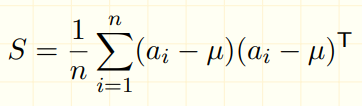

In [9]:
sigma = 0
for i in range(xx.shape[0]):
  temp = xx[i][:] - mu
  temp = temp.reshape((-1,1))
  # print(temp.shape)
  sigma += temp @ temp.transpose()
  # print(sigma.shape)
sigma /= n
sigma

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
sigma.shape

(784, 784)

In [11]:
evalues, evectors = np.linalg.eigh(sigma)

In [12]:
evalues

array([-3.96424551e-11, -2.87087376e-11, -2.77744696e-11, -1.42008600e-11,
       -1.30424039e-11, -1.12409762e-11, -9.62131203e-12, -8.79755877e-12,
       -6.71395097e-12, -4.53760435e-12, -2.53580046e-12, -2.06605940e-12,
       -1.48771058e-12, -1.34145677e-12, -5.08162176e-13, -2.13681403e-13,
       -1.76300889e-13, -1.28853318e-13, -2.05024581e-14, -8.28082560e-15,
       -3.31432224e-15, -3.88925349e-16, -5.41322064e-17, -3.90498805e-17,
       -1.35477910e-17, -1.38076821e-27, -2.79502863e-28, -1.55193808e-28,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.64632751e-28,  1.00147031e-27,  1.43782485e-27,  8.02359011e-19,
        9.27160394e-18,  2.47145461e-17,  6.85770438e-17,  1.28643994e-16,
        3.77919881e-16,  

In [13]:
evalues.shape,evectors.shape

((784,), (784, 784))

3) Plot the ordered eigenvalues $\lambda_1 \geq \cdots \geq \lambda_k \geq \cdots$ as a function $k = 1, \dots, d$ with the x axis in log scale, and the first few eigenvectors $u_1, \dots, u_k, \dots$ as $28 \times 28$ images.

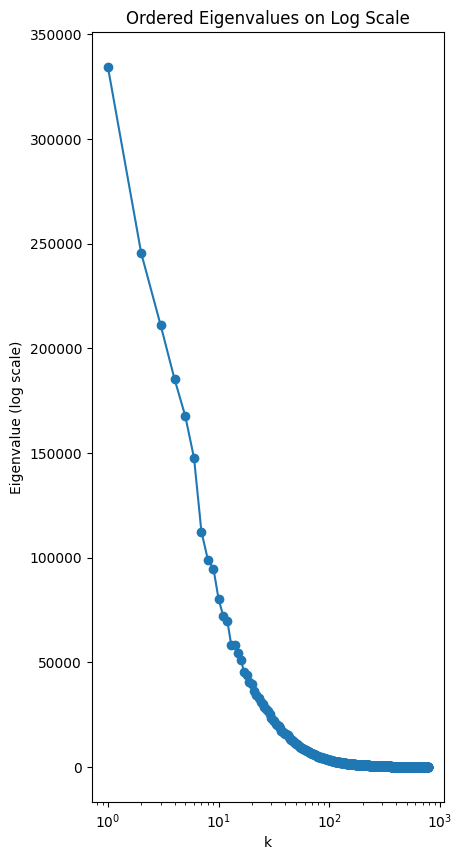

In [14]:
sorted_indices = np.argsort(evalues)[::-1]
evalues = evalues[sorted_indices]
evectors = evectors[:, sorted_indices]

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(evalues) + 1), evalues, marker='o')
plt.xscale('log')
plt.title('Ordered Eigenvalues on Log Scale')
plt.xlabel('k')
plt.ylabel('Eigenvalue (log scale)')
plt.show()

<ipython-input-18-69616d5fa98b>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(k, 1, i + 1)


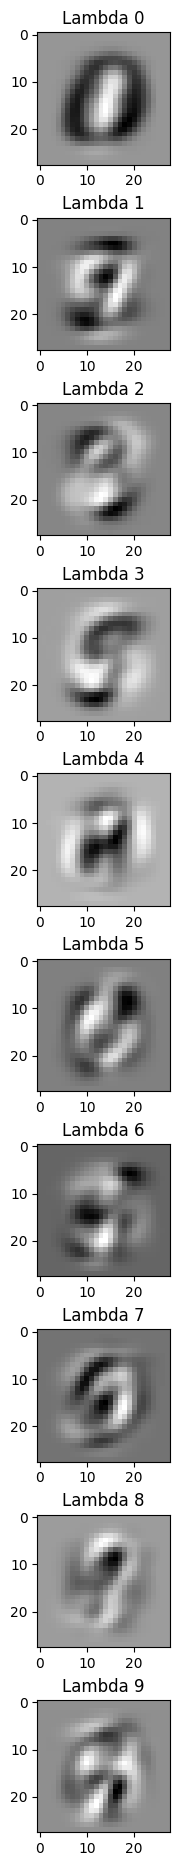

In [18]:
k = 10
plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1, wspace=0.4, hspace=0.4)
plt.subplot(1, 2, 2)
for i in range(k):
    temp = evectors[:, i].reshape(28, 28)
    plt.subplot(k, 1, i + 1)
    plt.imshow(temp, cmap='gray')
    plt.title('Lambda '+str(i))

plt.show()

### PCA compression of MNIST

4) Let $k \in \mathbb N$. Compute the $k$-dimensional PCA approximation $z_1, \dots, z_n$ of the MNIST dataset using the eigenvectors $u_1, \dots, u_k$. Then, compute the reconstructed images $\hat x_i = \mu + z_{i,1} u_1 + \cdots + z_{i,k} u_k$, which are equal to the mean $\mu$ plus the orthogonal projection of $x_i - \mu$ on $\mathrm{Span}(u_1, \dots, u_k)$. Display the first 5 reconstructed images $\hat x_1, \dots, \hat x_5$. Choose a small value of $k$ that still allows recognizing the digits.

In [19]:
#Let us take the first 100 eigen values or less than hundred if the eigen values become less than 1
for k in range(100):
  if evalues[k] < 1:
    break

lambda_k = evectors[:, :k]

Reconstructed Images


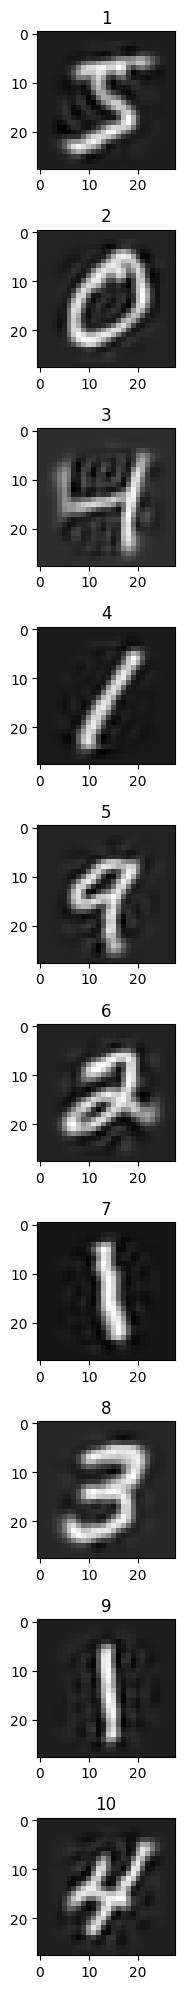

In [22]:
temp = xx - mu
z_n = np.dot(temp, lambda_k)

reconst_images = mu + np.dot(z_n, lambda_k.T)

n_dash = 10
plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1, wspace=0.4, hspace=0.4)
print('Reconstructed Images')
for i in range(n_dash):
    plt.subplot(n_dash, 1, i + 1)
    reconstructed_image = reconst_images[i, :].reshape(28, 28)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(i+1)

plt.tight_layout()
plt.show()